In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

def survie(model, pclass=3, sex=0, age=22):
    x = np.array([pclass, sex, age]).reshape(1, 3)
    print(model.predict(x))
    print(model.predict_proba(x))

titanic = pd.read_excel('titanic3.xls')
titanic = titanic[['survived', 'pclass', 'sex', 'age']]
print(titanic)

      survived  pclass     sex      age
0            1       1  female  29.0000
1            1       1    male   0.9167
2            0       1  female   2.0000
3            0       1    male  30.0000
4            0       1  female  25.0000
...        ...     ...     ...      ...
1304         0       3  female  14.5000
1305         0       3  female      NaN
1306         0       3    male  26.5000
1307         0       3    male  27.0000
1308         0       3    male  29.0000

[1309 rows x 4 columns]


In [2]:
titanic.dropna(axis=0, inplace=True)
print(titanic)

      survived  pclass     sex      age
0            1       1  female  29.0000
1            1       1    male   0.9167
2            0       1  female   2.0000
3            0       1    male  30.0000
4            0       1  female  25.0000
...        ...     ...     ...      ...
1301         0       3    male  45.5000
1304         0       3  female  14.5000
1306         0       3    male  26.5000
1307         0       3    male  27.0000
1308         0       3    male  29.0000

[1046 rows x 4 columns]


In [3]:
model = KNeighborsClassifier()
titanic['sex'].replace(['male', 'female'], [0,1], inplace=True)
y = titanic['survived']
X = titanic.drop('survived', axis=1)

model.fit(X, y)
predictions = model.score(X, y)
predictions

0.8279158699808795

In [4]:
survie(model, 1, 1, 23)

[1]
[[0.2 0.8]]


In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)
print(X_train.shape)
print(X_test.shape)

(836, 3)
(210, 3)


In [11]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
model.fit(X_train, y_train)
model.score(X_train, y_train)

0.8253588516746412

In [12]:
model.score(X_test, y_test)

0.7714285714285715

In [25]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_neighbors': np.arange(1,50),
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid.fit(X_train, y_train)
grid.best_score_

0.7679997148560023

In [26]:
grid.best_params_

{'metric': 'manhattan', 'n_neighbors': 5}

In [27]:
model = grid.best_estimator_
model.score(X_test, y_test)

0.7761904761904762

In [28]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, model.predict(X_test))

array([[106,  19],
       [ 28,  57]])

In [37]:
from sklearn.model_selection import learning_curve
N, train_score, val_score = learning_curve(model, X_train, y_train, train_sizes = np.linspace(0.2, 1.0, 50), cv=5)
N

array([133, 144, 155, 166, 177, 188, 199, 209, 220, 231, 242, 253, 264,
       275, 286, 297, 308, 319, 329, 340, 351, 362, 373, 384, 395, 406,
       417, 428, 438, 449, 460, 471, 482, 493, 504, 515, 526, 537, 548,
       558, 569, 580, 591, 602, 613, 624, 635, 646, 657, 668])

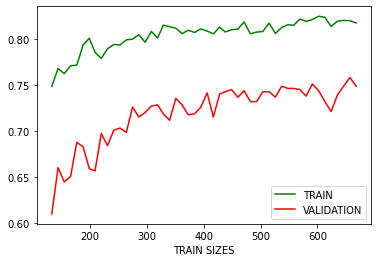

In [38]:
plt.plot(N, train_score.mean(axis=1), label='TRAIN', c='g')
plt.plot(N, val_score.mean(axis=1), label='VALIDATION', c='r')
plt.xlabel('TRAIN SIZES')
plt.legend()